In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [53]:
#LOAD DATA
movie_data=pd.read_csv("IMDb Movies India.csv")

In [3]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
movie_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
movie_data.shape

(15509, 10)

In [6]:
movie_data.describe() 

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
movie_data.dropna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


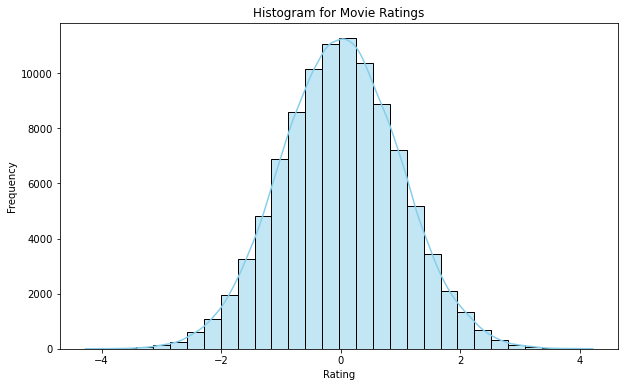

In [8]:
movie_data = pd.DataFrame({'Rating': np.random.randn(100000)})


plt.figure(figsize=(10, 6))
sns.histplot(x='Rating', data=movie_data, bins=30, kde=True, color='skyblue')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram for Movie Ratings')
plt.show()

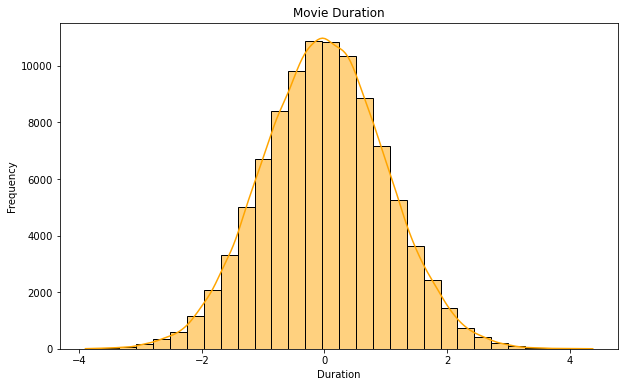

In [9]:
movie_data = pd.DataFrame({'Duration': np.random.randn(100000)})


plt.figure(figsize=(10, 6))
sns.histplot(x='Duration', data=movie_data, bins=30, kde=True, color='orange')

plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Movie Duration')
plt.show()

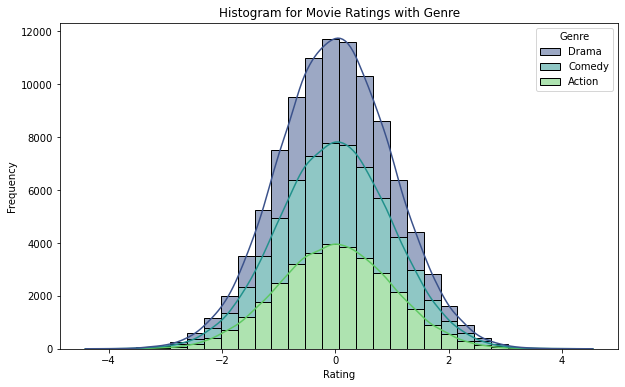

In [10]:
# Assuming you have a DataFrame with Rating and Genre columns
movie_data = pd.DataFrame({
    'Rating': np.random.randn(100000),
    'Genre': np.random.choice(['Action', 'Drama', 'Comedy'], size=100000)
})

plt.figure(figsize=(10, 6))
sns.histplot(x='Rating', data=movie_data, bins=30, kde=True, hue='Genre', multiple='stack', palette='viridis')

plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram for Movie Ratings with Genre')
plt.show()


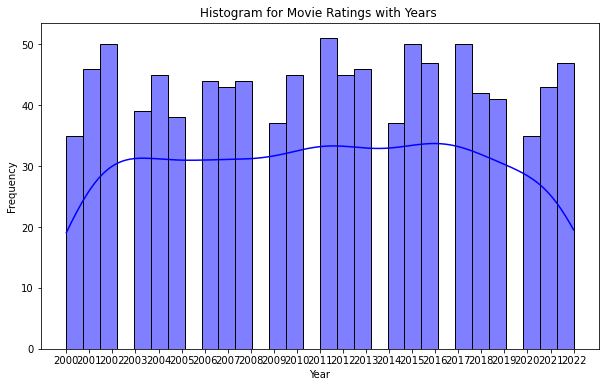

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

movie_data = pd.DataFrame({'Year': np.random.choice(range(2000, 2023), size=100000)})

downsampled_data = movie_data.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.histplot(x='Year', data=downsampled_data, bins=30, kde=True, color='blue')


plt.xticks(downsampled_data['Year'].unique())

plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram for Movie Ratings with Years ')
plt.show()


In [54]:
movie_data.dropna(subset=["Year", "Duration", "Genre", "Director", "Actor 1", "Actor 2", "Actor 3", "Votes"], inplace=True)

In [55]:
movie_data["Duration"] = movie_data["Duration"].str.extract('(\d+)').astype(float)
movie_data["Year"] = movie_data["Year"].str.extract('(\d+)').astype(int)
movie_data["Votes"] = movie_data["Votes"].str.extract('(\d+)').astype(int)


In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ["Name", "Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]:
    label_encoders[column] = LabelEncoder()
    movie_data[column] = label_encoders[column].fit_transform(movie_data[column])

In [57]:

x=movie_data.drop('Rating',axis=1)
y=movie_data['Rating']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [61]:
from sklearn.linear_model import LinearRegression
m=LinearRegression()
m.fit(X_train,Y_train)



LinearRegression()

In [66]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = m.predict(X_test)

# Calculate the R^2 score
test_r2_score = r2_score(Y_test, y_pred)

print(f"R^2 score on the test set: {test_r2_score:.2f}")


R^2 score on the test set: 0.05
